<a href="https://colab.research.google.com/github/Julian-Ramirez-M/Talleres/blob/main/Taller_3_Juliana_Prado_y_Juli%C3%A1n_Ram%C3%ADrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTEGRANTES DEL GRUPO:**
- Juliana Prado
- Julián Ramírez

**LIBRERIAS**

In [199]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cvxpy as cp
import warnings 
warnings.filterwarnings("ignore") 
import statsmodels.api as sm
#from statsmodels.tsa.api import acf, pacf, graphics
#from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

**PUNTO 1**

Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022:

In [200]:
activos = ["NKE","JPM","MCD","KO","GS"]


a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades,
betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

In [201]:
precios = yf.download(activos, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna() #Retornos de los activos
mu = pd.DataFrame(retornos.mean()) #Vector de retornos
mu

[*********************100%***********************]  5 of 5 completed


,0
GS,0.006664
JPM,0.006188
KO,0.008096
MCD,0.009071
NKE,0.011266


In [202]:
sigma = pd.DataFrame(retornos.std())
sigma

,0
GS,0.092545
JPM,0.080254
KO,0.057042
MCD,0.055288
NKE,0.084419


In [203]:
retornos.count()

GS     60
JPM    60
KO     60
MCD    60
NKE    60
dtype: int64

In [204]:
indice = ["^DJI"]
precios_i = yf.download(indice, start="2017-12-01", end= "2022-12-31", interval="1Mo")["Adj Close"]
retornos_i = np.log(precios_i/precios_i.shift()).dropna()
mu_i = retornos_i.mean()
mu_i

[*********************100%***********************]  1 of 1 completed


0.004889644163221778

In [205]:
retornos_i.count()

60

In [206]:
X = retornos_i
Y = retornos["GS"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        03:07:18   Log-Likelihood:                 93.013
No. Observations:                  60   AIC:                            -182.0
Df Residuals:                      58   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.007     -0.049      0.9

In [207]:
X = retornos_i
Y = retornos["JPM"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.20e-15
Time:                        03:07:18   Log-Likelihood:                 98.836
No. Observations:                  60   AIC:                            -193.7
Df Residuals:                      58   BIC:                            -189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.006      0.041      0.9

In [208]:
X = retornos_i
Y = retornos["KO"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.44e-08
Time:                        03:07:18   Log-Likelihood:                 103.96
No. Observations:                  60   AIC:                            -203.9
Df Residuals:                      58   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.006      0.832      0.4

In [209]:
X = retornos_i
Y = retornos["MCD"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    MCD   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     53.59
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.48e-10
Time:                        03:07:18   Log-Likelihood:                 108.71
No. Observations:                  60   AIC:                            -213.4
Df Residuals:                      58   BIC:                            -209.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.005      1.070      0.2

In [210]:
X = retornos_i
Y = retornos["NKE"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    NKE   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     52.65
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.09e-09
Time:                        03:07:18   Log-Likelihood:                 83.063
No. Observations:                  60   AIC:                            -162.1
Df Residuals:                      58   BIC:                            -157.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.008      0.745      0.4

In [211]:
betas_0 = pd.DataFrame([-0.0003, 0.0003, 0.0047, 0.0056, 0.0060]) 
betas_0.rename(index={0:"GS", 1:"JPM", 2:"KO", 3:"MCD", 4:"NKE"}, inplace=True)
betas_0.head()

,0
GS,-0.0003
JPM,0.0003
KO,0.0047
MCD,0.0056
NKE,0.0060


In [212]:
betas_1 = pd.DataFrame([1.4308, 1.2136, 0.6961, 0.7147, 1.0862])
betas_1.rename(index={0:"GS", 1:"JPM", 2:"KO", 3:"MCD", 4:"NKE"}, inplace=True)
betas_1.head()

,0
GS,1.4308
JPM,1.2136
KO,0.6961
MCD,0.7147
NKE,1.0862


In [213]:
R_squared = pd.DataFrame([ 0.682, 0.651, 0.418, 0.471, 0.467])
R_squared.rename(index={0:"GS", 1:"JPM", 2:"KO", 3:"MCD", 4:"NKE"}, inplace=True)
R_squared.head()

,0
GS,0.682
JPM,0.651
KO,0.418
MCD,0.471
NKE,0.467


In [214]:
CAPM_GS = 1.4308*mu_i
CAPM_GS

0.006996102868737721

In [215]:
CAPM_JPM = 1.2136*mu_i
CAPM_JPM

0.00593407215648595

In [216]:
CAPM_KO = 0.6961*mu_i
CAPM_KO

0.00340368130201868

In [217]:
CAPM_MCD = 0.7147*mu_i
CAPM_MCD

0.003494628683454605

In [218]:
CAPM_NKE = 1.0862*mu_i
CAPM_NKE

0.005311131490091496

In [219]:
CAPM = pd.DataFrame([CAPM_GS, CAPM_JPM, CAPM_KO, CAPM_MCD, CAPM_NKE])
CAPM.rename(index={0:"GS", 1:"JPM", 2:"KO", 3:"MCD", 4:"NKE"}, inplace=True)
CAPM.head()

,0
GS,0.006996
JPM,0.005934
KO,0.003404
MCD,0.003495
NKE,0.005311


In [220]:
tab = pd.concat([mu, sigma, betas_0, betas_1, R_squared, CAPM],axis=1)
tab.columns = ["E(r)", "Volatilidad", "Beta 0", "Beta 1", "Coef. Det","CAPM"]
tab

,E(r),Volatilidad,Beta 0,Beta 1,Coef. Det,CAPM
GS,0.006664,0.092545,-0.0003,1.4308,0.682,0.006996
JPM,0.006188,0.080254,0.0003,1.2136,0.651,0.005934
KO,0.008096,0.057042,0.0047,0.6961,0.418,0.003404
MCD,0.009071,0.055288,0.0056,0.7147,0.471,0.003495
NKE,0.011266,0.084419,0.0060,1.0862,0.467,0.005311


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

In [221]:
CAPM_2 = [CAPM_GS, CAPM_JPM, CAPM_KO, CAPM_MCD, CAPM_NKE]
CAPM_2


[0.006996102868737721,
 0.00593407215648595,
 0.00340368130201868,
 0.003494628683454605,
 0.005311131490091496]

In [222]:
Beta_2 = [1.4308, 1.2136, 0.6961, 0.7147, 1.0862]
Beta_2

[1.4308, 1.2136, 0.6961, 0.7147, 1.0862]

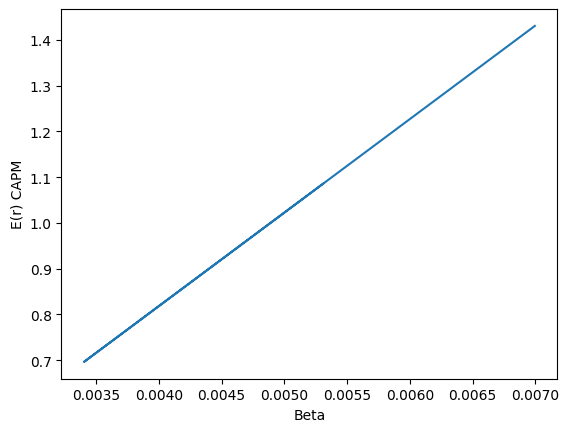

In [223]:
P2 = plt.plot(CAPM_2, Beta_2, "-")
plt.ylabel("E(r) CAPM")
plt.xlabel("Beta")
plt.show();

**PUNTO 2**

In [224]:
activos = ["NKE","JPM","MCD","KO","GS"]

In [225]:
precios = yf.download(activos, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna() #Retornos de los activos

[*********************100%***********************]  5 of 5 completed


In [226]:
ind=['^DJI']
indice= yf.download(ind, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


A).

In [227]:
mu = pd.DataFrame(retornos.mean()) 
cov = pd.DataFrame(retornos.cov())
sigma = pd.DataFrame(retornos.std())

In [228]:
n = len(mu)
x = cp.Variable(n)
objetive = cp.Minimize(cp.quad_form(x,cov)) 
constraints = [x @ mu == 1, x>=0] 
prob = cp.Problem(objetive,constraints)
prob.solve()
sharpe = round(pd.DataFrame(x.value/sum(x.value)),3)
sharpe.index=activos
sharpe.columns=['Pesos']
sharpe

,Pesos
NKE,0.000
JPM,0.000
MCD,0.189
KO,0.551
GS,0.260


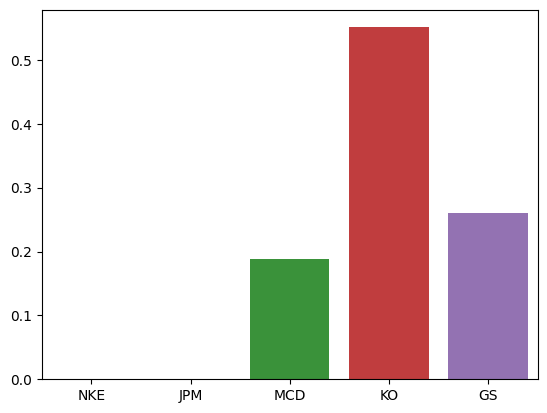

In [229]:
sns.barplot(sharpe.T);

Para el portafolio de Sharpe sin cortos, no se debe invertir en NKE, ni en JPM. El 0,55 de la inversión se le da a KO, seguido del 0,22 atribuido a GS y por último, 0,18 a MCD. 

B).

In [230]:
#Para hacer el VaR paramétrico primero debemos sacar el wpmvg para multplicarlo con los retornos
n=5
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpmvg = x.value
wpmvg

array([4.30100240e-21, 5.97634709e-02, 3.58159058e-01, 4.63705369e-01,
       1.18372102e-01])

In [231]:
from scipy.stats import norm

In [232]:
#VaR con nivel de confianza del 95%
ret=retornos@wpmvg
rp=ret.mean()
sigmap=ret.std()
alpha=0.05
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.07357848467567568

Con un 95% de confianza, el riesgo de perdida al invertir en este portafolio es de 7.3%

In [233]:
#VaR con nivel de confianza del 99%
alpha2=0.01
VaRp2=rp-norm.ppf(1-alpha2)*sigmap
VaRp2

-0.10771339480212656

Con un 99% de confianza, el riesgo de perdida al invertir en este portafolio es de 10.7%

C).

In [234]:
#Estimación histórica al 95% de confianza
np.percentile(ret,5)

-0.07509520719708564

En la estimación histórica con un 95% de confianza, el riesgo de perdida de este portafolio es de 7.5%

In [235]:
#Estimación histórica al 95% de confianza
np.percentile(ret,1)

-0.13068095476548922

En la estimación histórica con un 99% de confianza, el riesgo de perdida de este portafolio es de 13.06%

D).

In [236]:
#Montecarlo Simulación VaR
unif_dis=np.random.normal(rp,sigmap,10000)
simulacion=np.percentile(unif_dis,5)
simulacion

-0.07337002909637684

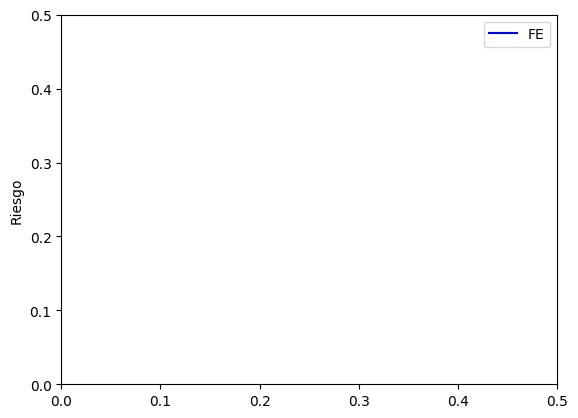

In [237]:
#Frontera eficiente
plt.plot(unif_dis,'blue',label='FE')
plt.ylabel('Retorno Esperado')
plt.ylabel('Riesgo')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.legend()
plt.show();

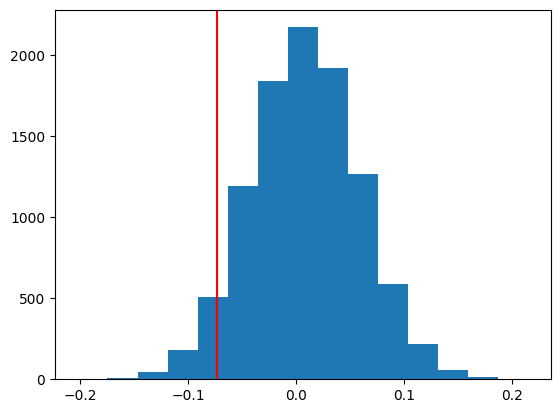

In [238]:
plt.hist(unif_dis,bins='sturges')
plt.axvline(simulacion, color='r',label='VaR');

No se encuentran diferencias significativas entre el VaR de simulación y el VaR paramétrico

**PUNTO 3**

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [239]:
act_p3 = yf.download("DIS",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos_3 = np.log(act_p3/act_p3.shift()).dropna()
mu_3 = retornos_3.mean()
sigma_3 = retornos_3.std()

[*********************100%***********************]  1 of 1 completed


In [240]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [241]:
T = 1
mu = mu_3 * 12
sigma = sigma_3 * np.sqrt(12)
S0 = act_p3[-1]
NS = 10000 
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)

Text(0.5, 0, 'Tiempo')

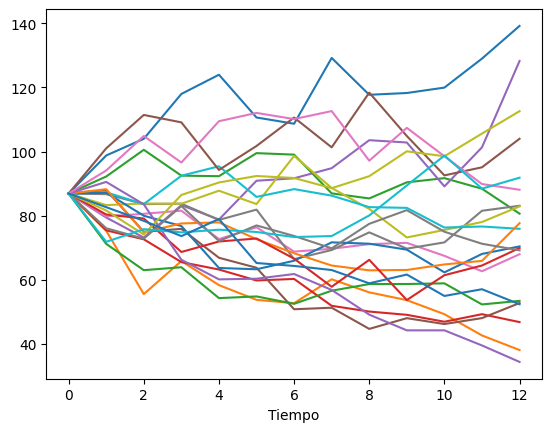

In [242]:
plt.plot(np.transpose(St[:21])) 
plt.xlabel("Tiempo")

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

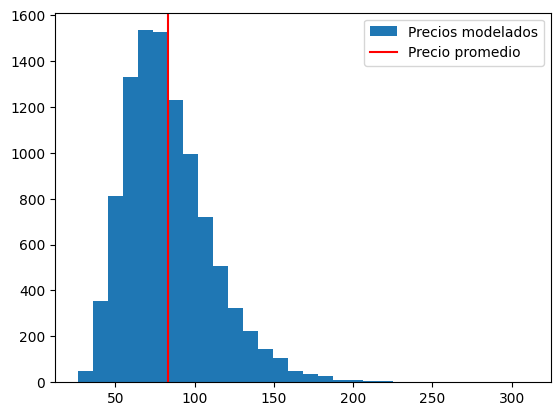

In [243]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [244]:
C = (S0*np.exp(mu*T))
C

83.85549935349091

In [245]:
C_1= St[:,-1].mean()
C_1

83.45716482202252

**Teniendo en cuenta el resultado anterior (83.68), se recomienda no hacer inversión sobre este activo, teniendo en cuenta que el precio promedio de la simulación es menor al ultimo precio historico (86.88). Lo que se puede interpretar como una caida en el precio en el Activo DIS.**

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [246]:
D = St[:,-1]
D_1 = len(D[D<S0])/NS
D_1 * 100

61.44

In [247]:
S0

86.87999725341797

**La probabilidad de que el precio de DIS sea inferior a S0 (86.88), es del 60.06%.**

**PUNTO 4**

In [248]:
def pru_ou(x0, mu, sigma, k, T, dt, ns):

    steps = int(T/dt)
    y = np.zeros((ns, steps))
    for i in range(ns):
        x = np.zeros(steps)
        x[0] = x0
        for j in range(1, steps):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

In [249]:
x0 = 1              
mu = 3               
sigma = 0.3   
M = 60       
k = 1               
T = 5                
dt = T/M         
ns = 10000   

In [250]:
tr = pru_ou(x0, mu, sigma, k, T, dt, ns)
tr.mean()

2.6028172445832896

In [251]:
tr.var()

0.300759677746174

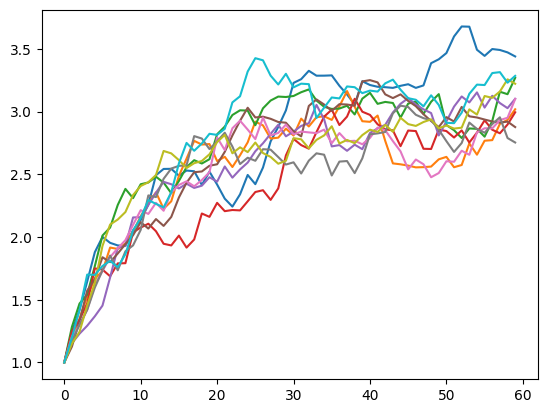

In [252]:
plt.plot(np.transpose(tr[:10])) 
plt.show()

El activo va a tener un movimiento creciente en el periodo de las simulaciones con una media de 2.6. Y una varianza de 0.30.

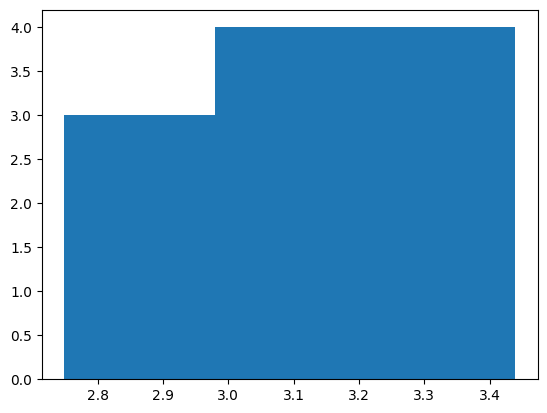

In [253]:
plt.hist(tr[0:11,-1], bins = 3);

Según el histograma la distribución es uniforme con unos beans=3. Con beans mayores a 10 no se encuentra una distribución clara

In [254]:
r0 = 0.03              
mu = 0.05               
sigma = 0.15   
M = 12       
k = 1               
T = 1                
dt = T/M         
ns = 100  

In [255]:
tr2= pru_ou(r0, mu, sigma, k, T, dt, ns)

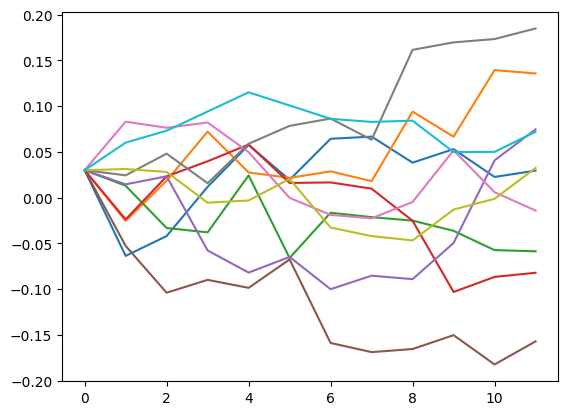

In [256]:
plt.plot(np.transpose(tr2[:10])) 
plt.show()

**PUNTO 5**

**HG=F**

[*********************100%***********************]  1 of 1 completed


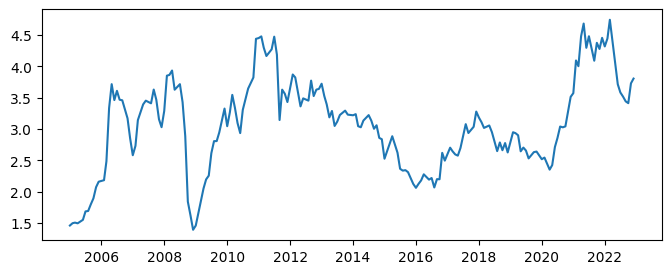

In [257]:
HG_F = yf.download("HG=F",start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
plt.figure(figsize=(8,3))
plt.plot(HG_F);

In [258]:
retornos_HG = np.log(HG_F/HG_F.shift()).dropna()
mu_HG = retornos_HG.mean()
sigma_HG = retornos_HG.std()

In [259]:
act_1 = adfuller(HG_F)  
print("ADF test: %f" % act_1[0])
print("P-value: %f" % act_1[1])
print("Citical values:")
for key, value in act_1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.058196
P-value: 0.029806
Citical values:
	1%: -3.466598
	5%: -2.877467
	10%: -2.575260


Ho = ADF test > Critical Values  ---> ESTACIONARIO

H1 = Ho es verdadero

*   -3.058196 < -2.877467  ---> RECHAZO Ho

**A un nivel de significancia del 5%, el activo Cooper (HG=F) no es estacionario**






In [260]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [261]:
T = 1
mu = mu_HG * 12
sigma = sigma_HG * np.sqrt(12)
S0 = HG_F[-1]
NS = 100 
M = 12 
St_HG_F = PathsGBM(S0,mu,sigma,T,NS,M)
St_HG_F

array([[3.80550003, 4.12570331, 4.31907854, ..., 3.85579778, 3.75450383,
        3.74706446],
       [3.80550003, 3.40338058, 3.48586992, ..., 2.63145328, 2.26710373,
        2.44706334],
       [3.80550003, 3.44286077, 3.33044934, ..., 3.74121113, 4.2081195 ,
        4.56741172],
       ...,
       [3.80550003, 3.29311358, 3.23065496, ..., 3.63133588, 3.75702414,
        4.25790693],
       [3.80550003, 3.97644785, 4.54619082, ..., 4.56373096, 4.76156464,
        4.46756481],
       [3.80550003, 3.58646105, 3.62609317, ..., 5.43235925, 5.26607735,
        5.31123017]])

Text(0.5, 0, 'Tiempo')

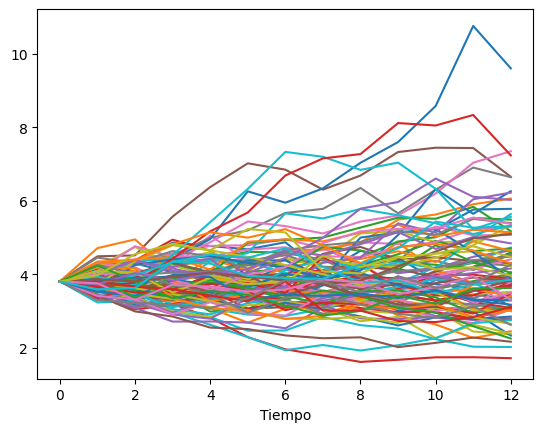

In [262]:
plt.plot(np.transpose(St_HG_F)) 
plt.xlabel("Tiempo")

In [263]:
H1= St_HG_F[:,-1].mean()
H1

4.120408360590792

In [264]:
S0_H

3.805500030517578

**Se recomienda invertir en el activo Cooper (HG=F), teniendo en cuenta que el promedio de los precios simulados es de 4.02, siendo este valor mayor al ultimo precio registrado en su historico, 3.81, lo que se puede interpretar como una oportunidad de inversión, ya que el precio del activo crecerá.**

**KC=F**

[*********************100%***********************]  1 of 1 completed


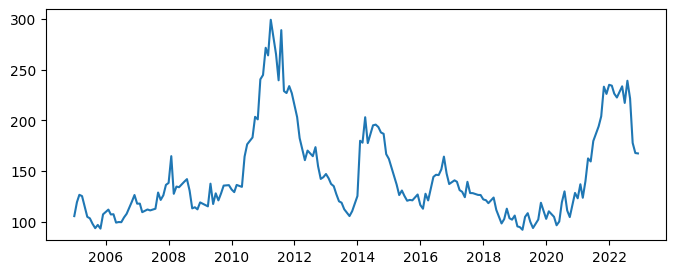

In [265]:
KC_F = yf.download("KC=F",start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
plt.figure(figsize=(8,3))
plt.plot(KC_F);

In [266]:
retornos_KC = np.log(KC_F/KC_F.shift()).dropna()
mu_KC = retornos_KC.mean()
sigma_KC = retornos_KC.std()

In [267]:
act_2 = adfuller(KC_F)  
print("ADF test: %f" % act_2[0])
print("P-value: %f" % act_2[1])
print("Citical values:")
for key, value in act_2[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


Ho = ADF test > Critical Values  ---> ESTACIONARIO

H1 = Ho es verdadero

*   -3.329256 < -2.877826  ---> RECHAZO Ho

**A un nivel de significancia del 5%, el activo Coffee Futures (KC=F) no es estacionario**

In [268]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [269]:
T = 1
mu = mu_KC * 12
sigma = sigma_KC * np.sqrt(12)
S0 = KC_F[-1]
NS = 100 
M = 12 
St_KC_F = PathsGBM(S0,mu,sigma,T,NS,M)
St_KC_F

array([[167.30000305, 170.83564957, 177.99890661, ..., 133.63306644,
        136.16358771, 127.63466529],
       [167.30000305, 160.55438592, 141.45914134, ..., 124.69106131,
        128.19221246, 107.25021013],
       [167.30000305, 169.23539836, 172.3625161 , ..., 151.8935758 ,
        129.41163789, 109.74926217],
       ...,
       [167.30000305, 151.0002221 , 156.43594125, ..., 167.54520874,
        139.59818035, 142.79336792],
       [167.30000305, 172.86936992, 203.40783118, ..., 186.98233419,
        180.50804803, 178.62690331],
       [167.30000305, 160.64444197, 189.0925556 , ..., 185.35931489,
        184.27794346, 162.95746917]])

Text(0.5, 0, 'Tiempo')

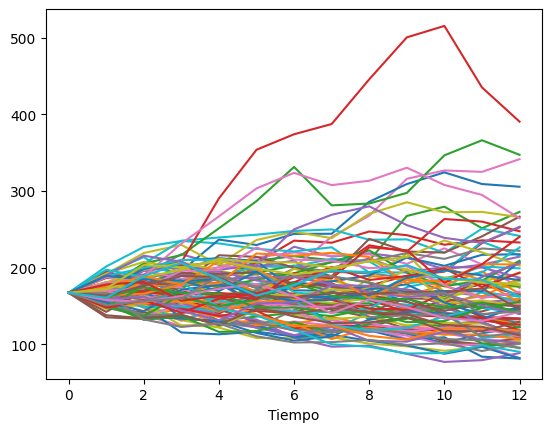

In [270]:
plt.plot(np.transpose(St_KC_F)) 
plt.xlabel("Tiempo")

In [271]:
K1= St_KC_F[:,-1].mean()
K1

165.44282611233018

In [272]:
S0

167.3000030517578

**Se recomienda invertir en el activo Coffee futures (KC=F), teniendo en cuenta que el promedio de los precios simulados es de 179.92, siendo este valor mayor al ultimo precio registrado en su historico, 167.30, lo que se puede interpretar como una oportunidad de inversión, ya que el precio del activo crecerá.**

**NG=F**

[*********************100%***********************]  1 of 1 completed


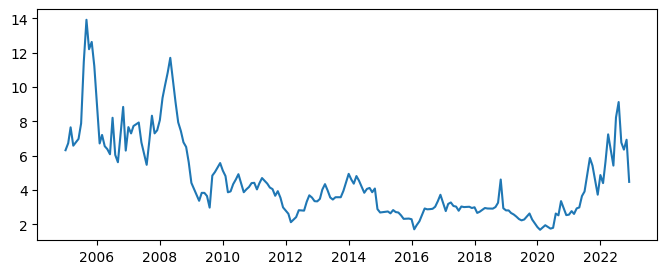

In [273]:
NG_F = yf.download("NG=F",start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"]
plt.figure(figsize=(8,3))
plt.plot(NG_F);

In [274]:
retornos_NG = np.log(NG_F/NG_F.shift()).dropna()
mu_NG = retornos_NG.mean()
sigma_NG = retornos_NG.std()

In [275]:
act_3 = adfuller(NG_F)  
print("ADF test: %f" % act_3[0])
print("P-value: %f" % act_3[1])
print("Citical values:")
for key, value in act_3[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.157328
P-value: 0.022591
Citical values:
	1%: -3.468280
	5%: -2.878202
	10%: -2.575653


Ho = ADF test > Critical Values  ---> ESTACIONARIO

H1 = Ho es verdadero

*   -3.157328 < -2.878202  ---> RECHAZO Ho

**A un nivel de significancia del 5%, el activo Natural Gas (NG=F) no es estacionario**

In [276]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [277]:
T = 1
mu = mu_NG * 12
sigma = sigma_NG * np.sqrt(12)
S0 = NG_F[-1]
NS = 100 
M = 12 
St_NG_F = PathsGBM(S0,mu,sigma,T,NS,M)
St_NG_F

array([[ 4.4749999 ,  4.32892138,  3.71767282, ...,  2.62468358,
         2.71852683,  2.4452187 ],
       [ 4.4749999 ,  4.89251826,  4.21052916, ...,  3.61836169,
         3.1308778 ,  3.6671994 ],
       [ 4.4749999 ,  5.92684658,  5.28398062, ...,  2.70813236,
         2.34587901,  2.7541553 ],
       ...,
       [ 4.4749999 ,  4.49502031,  4.05601566, ...,  2.6119079 ,
         2.02321759,  2.04146619],
       [ 4.4749999 ,  5.30053676,  6.92405738, ..., 11.51147787,
        10.91282738, 10.27090744],
       [ 4.4749999 ,  4.68869887,  3.65601632, ...,  2.20731643,
         1.95490079,  1.94941208]])

Text(0.5, 0, 'Tiempo')

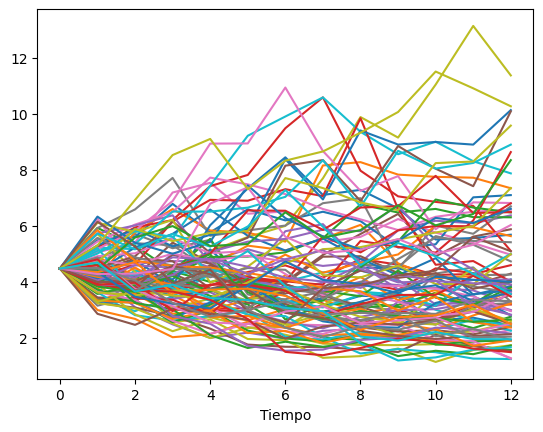

In [278]:
plt.plot(np.transpose(St_NG_F)) 
plt.xlabel("Tiempo")

In [279]:
N1= St_NG_F[:,-1].mean()
N1

4.198047233250939

In [280]:
S0

4.474999904632568

**No se recomienda invertir en el activo Natural Gas (NG=F), teniendo en cuenta que el promedio de los precios simulados es de 3.82, siendo este valor menor al ultimo precio registrado en su historico, 4.47, lo que se puede indicar una caida en el precio del activo, lo que lo hace una inversión poco atractiva y no rentable.**